#  Diamond 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### price  in US dollars (\$326--\$18,823)

### carat weight of the diamond (0.2--5.01)

### cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

### color diamond colour, from J (worst) to D (best)

### clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

### x length in mm (0--10.74)

### y width in mm (0--58.9)

### z depth in mm (0--31.8)

### depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

### table width of top of diamond relative to widest point (43--95)

# Basic checks

In [3]:
df.shape

(53940, 10)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
num_data=df.select_dtypes(include=["float64","int64"])
print("numerical colums",num_data.columns)

numerical colums Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [9]:
cat_data=df.select_dtypes(include=["O"])
print("categorical colums",cat_data.columns)

categorical colums Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
for i in cat_data.drop("color",axis=1):
    print(i,df[i].unique())
    print(df[i].value_counts())
    print("**********************")

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
**********************
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
**********************


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [12]:
df.describe

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [13]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# EDA

In [14]:
## Univariate Analysis
!pip install sweetviz#installing sweetviz library`


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: 'sweetviz#installing': Expected end or semicolon (after name and no valid version specifier)
    sweetviz#installing
            ^


In [15]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(df)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
d1=df[['cut','color','clarity']]

<Axes: xlabel='price', ylabel='Count'>

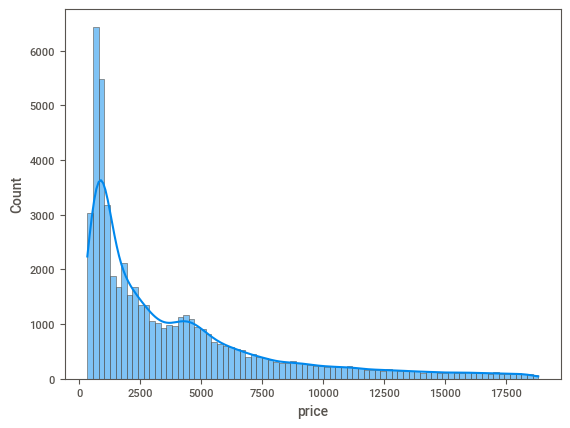

In [17]:
sns.histplot(x=df.price,kde=True)

<Axes: xlabel='carat', ylabel='Count'>

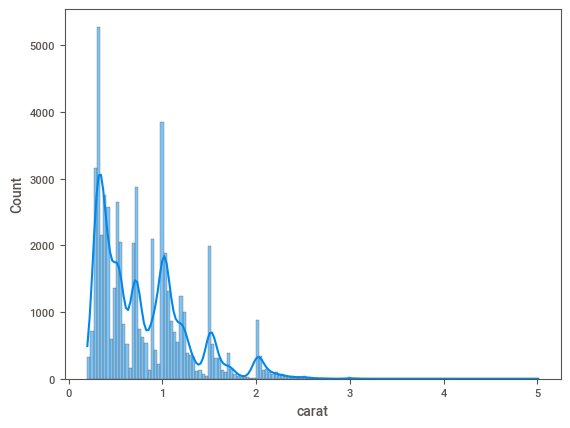

In [18]:
sns.histplot(x=df.carat,kde=True)

<Axes: xlabel='depth', ylabel='Count'>

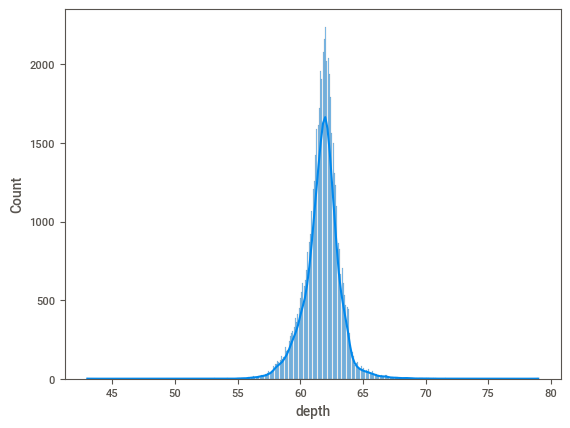

In [19]:
sns.histplot(x=df.depth,kde=True)

<Axes: xlabel='table', ylabel='Count'>

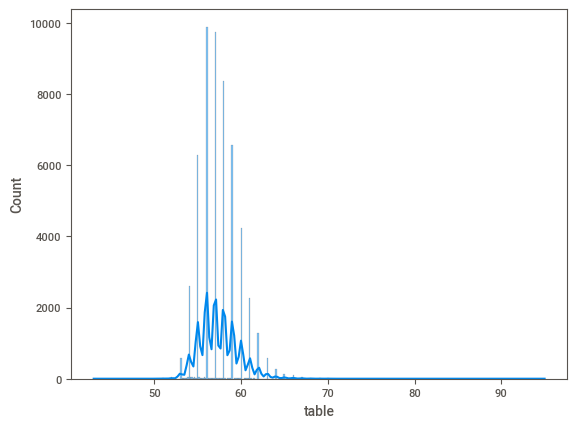

In [20]:
sns.histplot(x=df.table,kde=True)

<Axes: xlabel='x', ylabel='Count'>

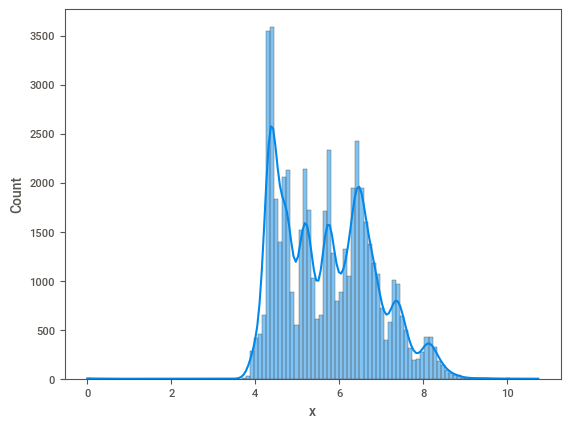

In [21]:
sns.histplot(x=df.x,kde=True)

<Axes: xlabel='y', ylabel='Count'>

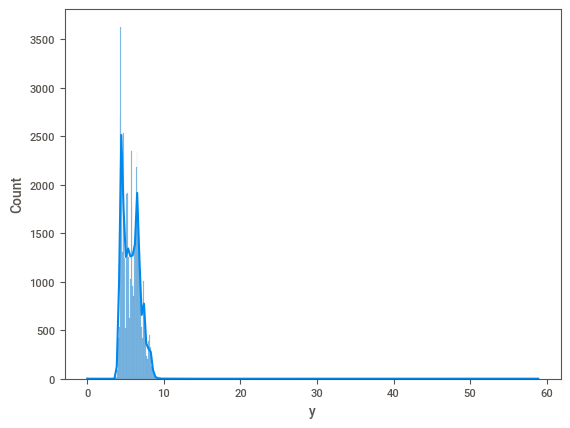

In [22]:
sns.histplot(x=df.y,kde=True)

<Axes: xlabel='z', ylabel='Count'>

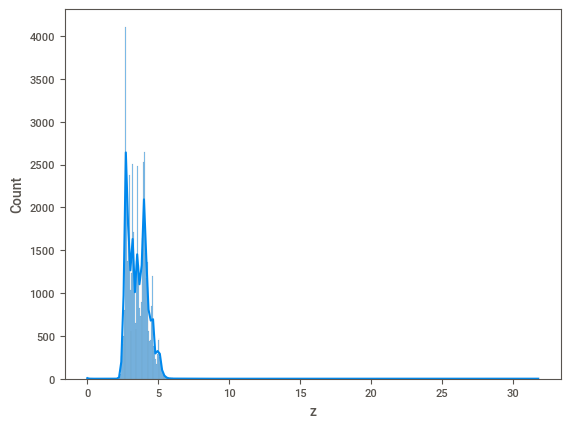

In [23]:
sns.histplot(x=df.z,kde=True)

<Axes: xlabel='price'>

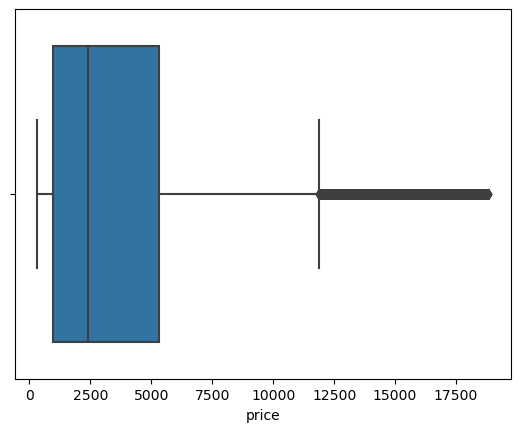

In [4]:
sns.boxplot(x=df.price)

<Axes: xlabel='cut', ylabel='count'>

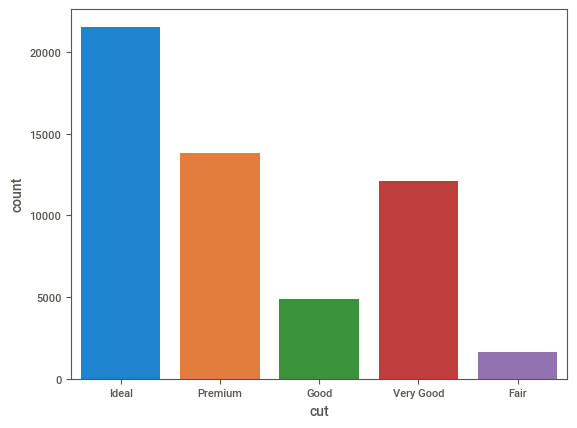

In [24]:
sns.countplot(x=df.cut)

<Axes: xlabel='color', ylabel='count'>

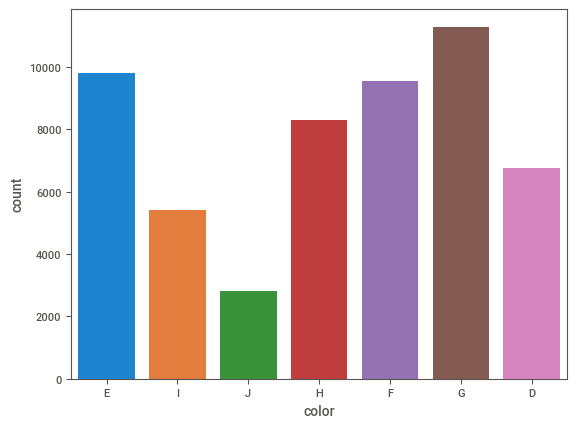

In [25]:
sns.countplot(x=df.color)

<Axes: xlabel='clarity', ylabel='count'>

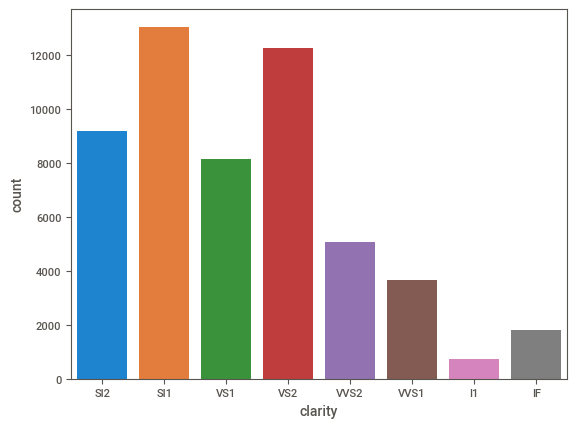

In [26]:
sns.countplot(x=df.clarity)

# Bivariate Analysis

<Axes: xlabel='cut', ylabel='price'>

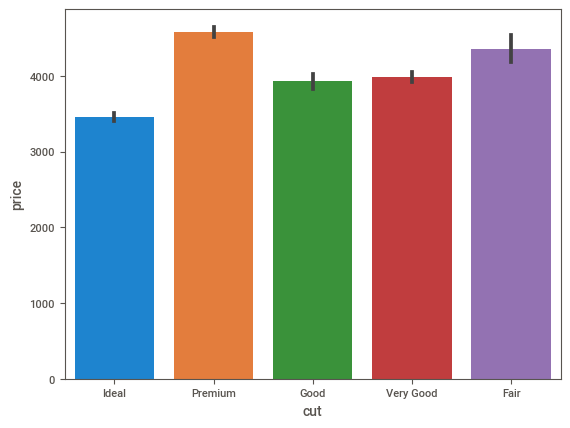

In [27]:
sns.barplot(data=df,x=df.cut,y=df.price)

<Axes: xlabel='color', ylabel='price'>

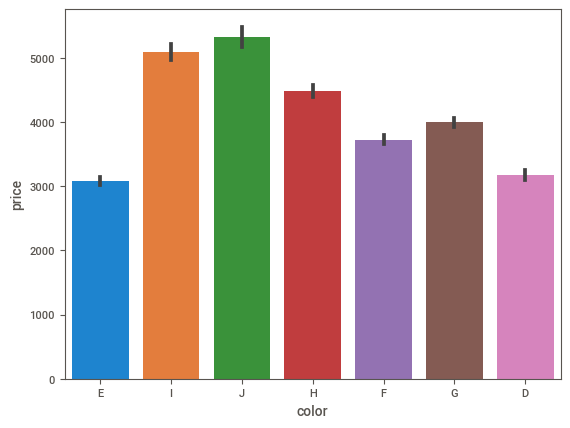

In [28]:
sns.barplot(data=df,x=df.color,y=df.price)

<Axes: xlabel='clarity', ylabel='price'>

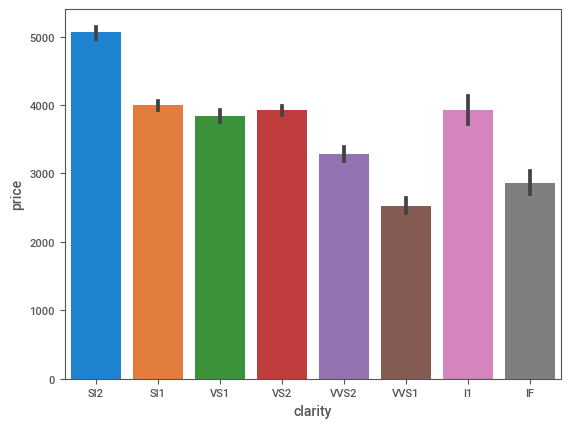

In [29]:
sns.barplot(data=df,x=df.clarity,y=df.price)

# Convert Categorical Columns to Numerical Columns 

In [30]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [31]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [32]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [33]:
## Encoding MaritalStatus

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.cut=label.fit_transform(df.cut)#applying label encoder to  marital status

In [34]:
## Encoding MaritalStatus

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.color=label.fit_transform(df.color)#applying label encoder to  marital status

In [35]:
## Encoding MaritalStatus

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.clarity=label.fit_transform(df.clarity)#applying label encoder to  marital status

In [36]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


# Feature Selection 

<Axes: >

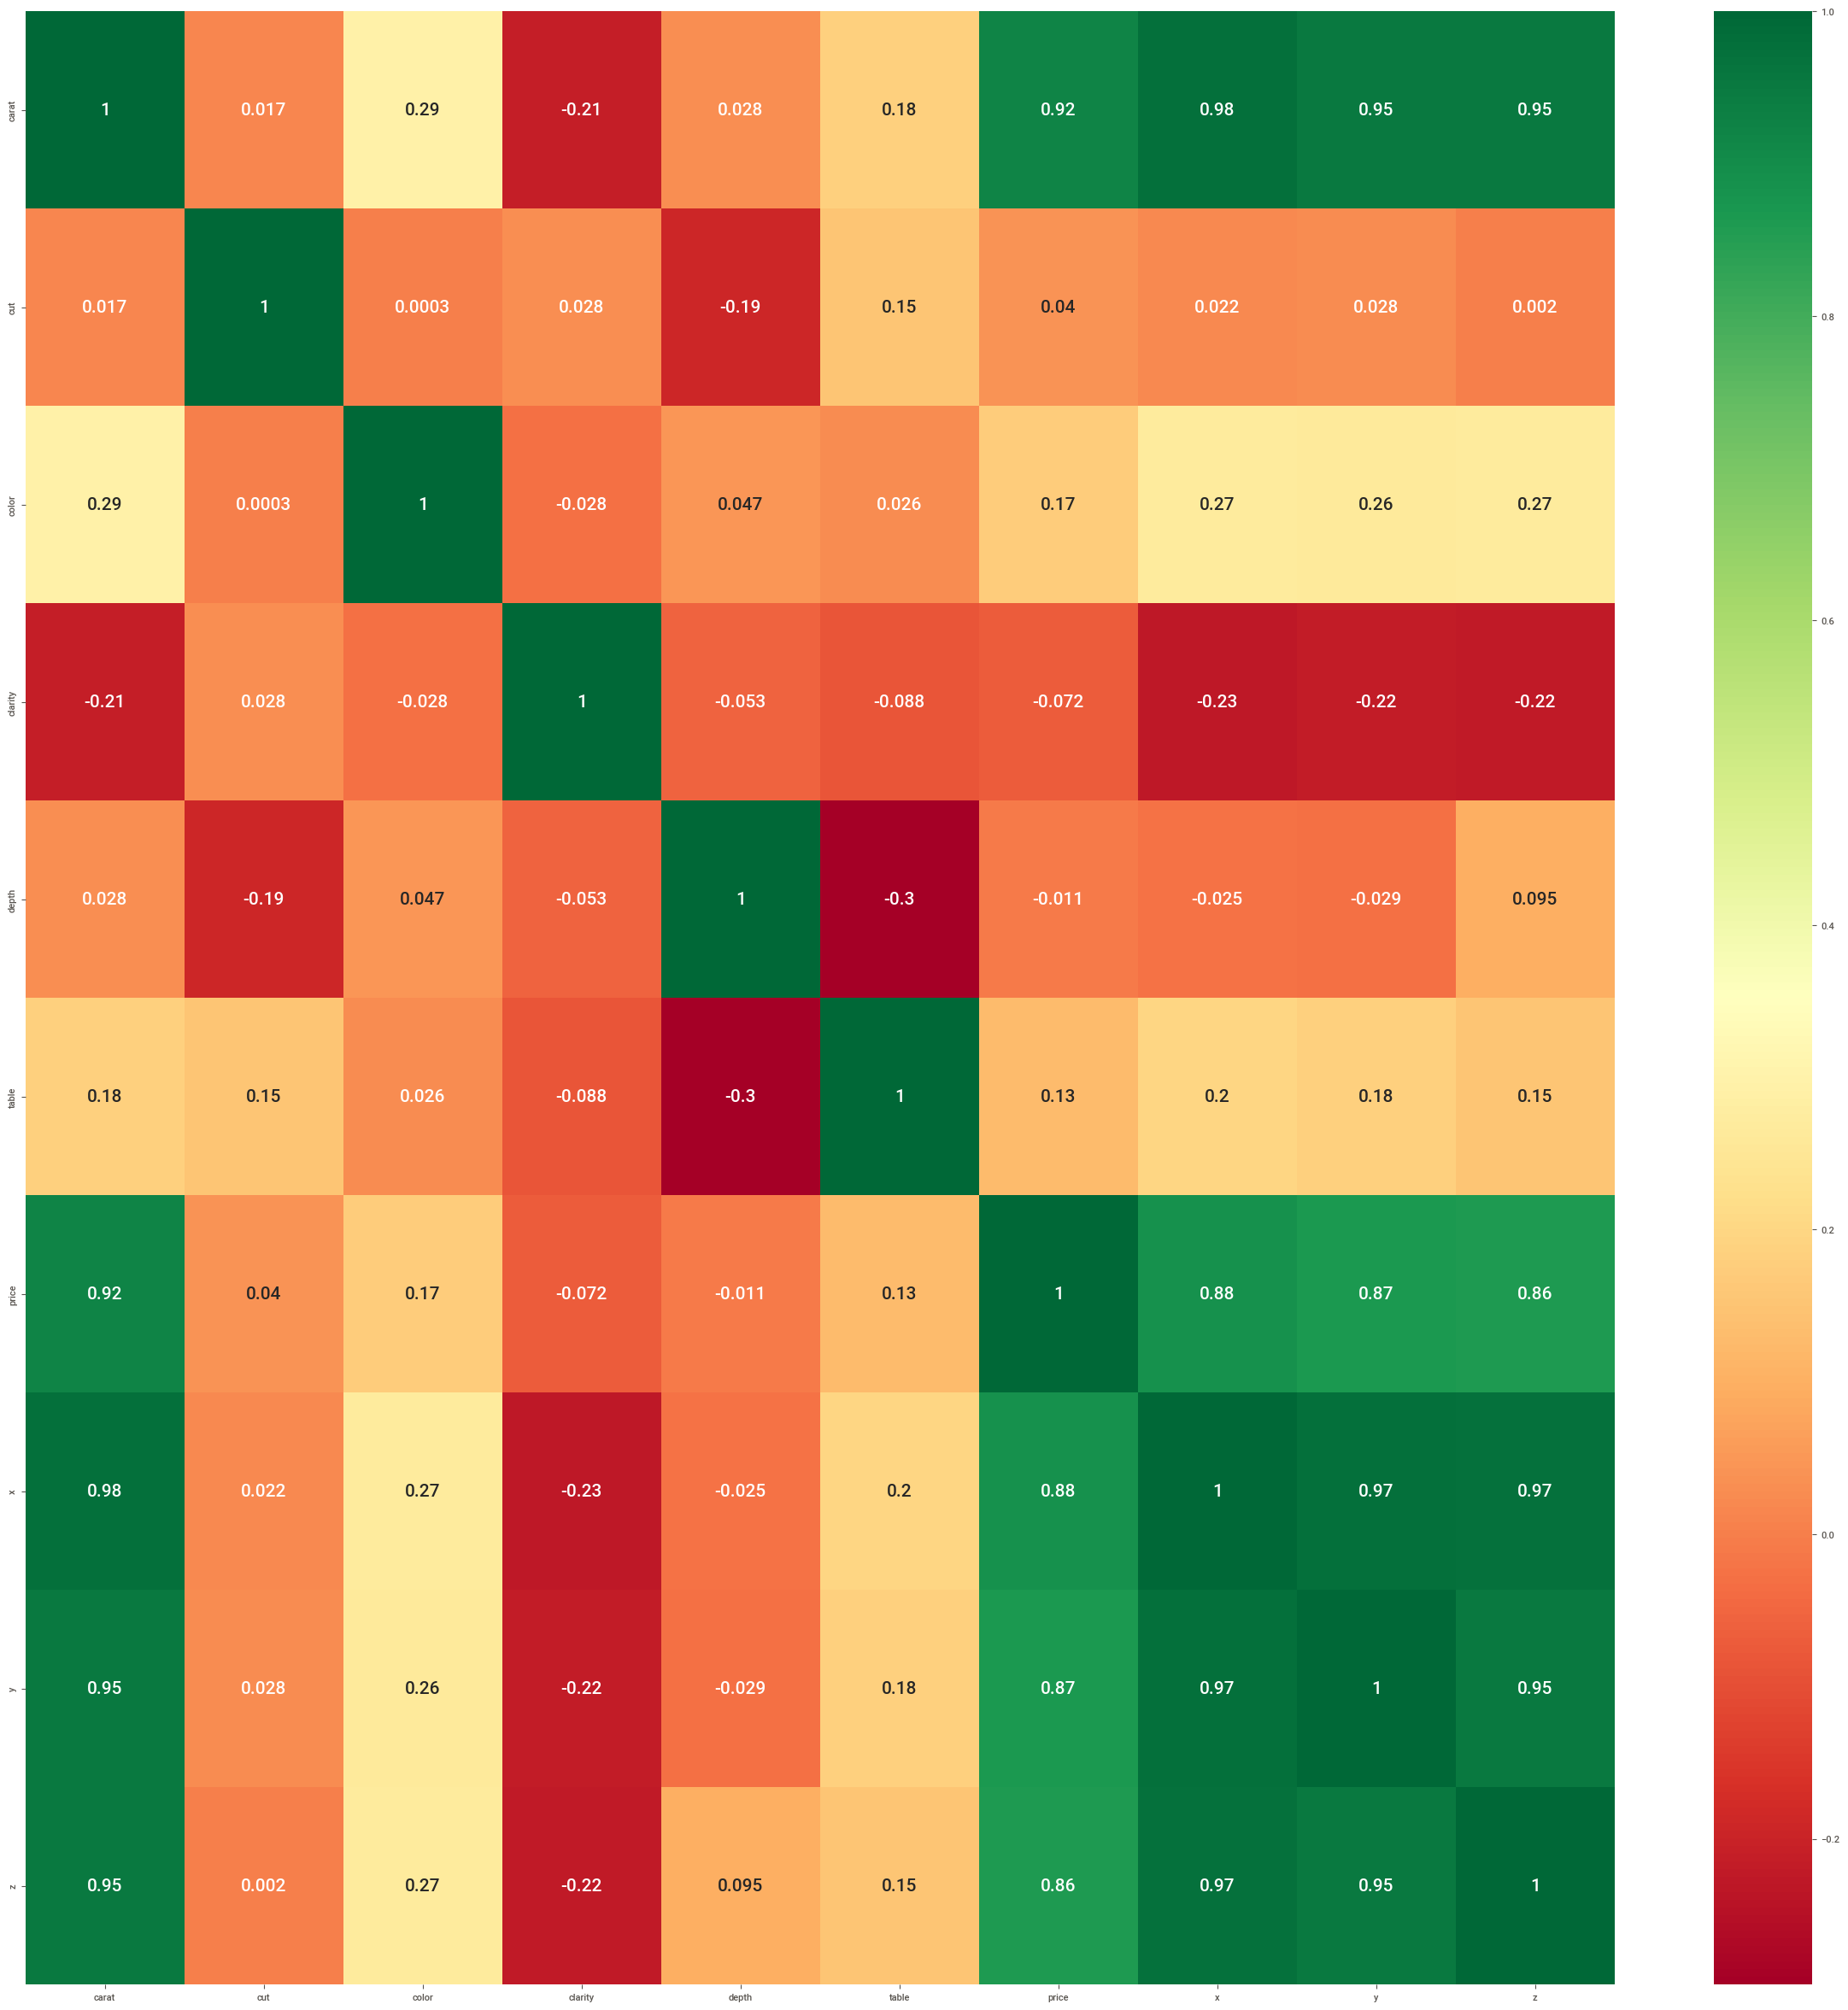

In [37]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

# Deleting Unnecessary columns 

In [38]:
## Removing constant features
df.drop(['x','y','z'], axis="columns", inplace=True)#droping those columns which have std=0 

In [39]:
df

,carat,cut,color,clarity,depth,table,price
0,0.23,2,1,3,61.5,55.0,326
1,0.21,3,1,2,59.8,61.0,326
2,0.23,1,1,4,56.9,65.0,327
3,0.29,3,5,5,62.4,58.0,334
4,0.31,1,6,3,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757
53936,0.72,1,0,2,63.1,55.0,2757
53937,0.70,4,0,2,62.8,60.0,2757
53938,0.86,3,4,3,61.0,58.0,2757


# Model Creation 

In [40]:
## Split data into x and y
x = df.drop('price', axis=1)
y = df.price

In [41]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Linear Regression 

In [42]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 1899993.0560388109
R-squared (R2) score: 0.8804796882279721


# Random Forest Regressor

In [43]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)



Mean Squared Error: 304680.18981154857
R-squared (R2) score: 0.9808338924390821


# Gradient Boosting Regressor

In [44]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


GB = GradientBoostingRegressor(n_estimators=700)
GB.fit(x_train, y_train)

y_pred = GB.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 315910.04460882064
R-squared (R2) score: 0.980127471043352


# KNeighbors Regressors

In [45]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

y_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)



Mean Squared Error: 3230806.786043752
R-squared (R2) score: 0.7967639759967391


# ANALYSIS

### 1. Linear Regression        r- square == 0.88 ==> 88%
 


### 2. Random Forest Regressor        r- square == 0.9808 ==> 98.08%



### 3. Gradient Boosting Regressor       r-square == 0.9801 ==> 98.01%



### 4. KNeighbours Regressor         r-square ==0.79 ==> 79% 

#### I WOULD RECOMMEND RANDOM FOREST  OR GRADIENT BOOSTING TO ANALYZE THE DIAMONDS